# Tratamiento de Valores Nulos

## Importar Librerías

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import data_util as util

## Importar los datos

In [17]:
ruta = '../data/calidad_aire.csv'
ruta_nuevoCSV = '../data/calidad_aire_clean.csv'
data = pd.read_csv(ruta, delimiter=',', engine='python', index_col=0)
data.head(2)

,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD
FECHA,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2019.0,1.0,1.0,0,Martes,8.0,13.0,0.7,79.0,24.0,32.0,3.84,6.4,6.9,50.0
2019-01-01 01:00:00,2019.0,1.0,1.0,1,Martes,8.0,13.0,0.6,76.0,33.0,105.0,3.61,4.9,6.7,48.0


### Cantidad de Registros Importados

In [18]:
data.shape

(38256, 15)

### Identificación de los tipos de columnas

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38256 entries, 2019-01-01 00:00:00 to 2023-05-31 23:00:00
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ANO          38256 non-null  float64
 1   MES          38256 non-null  float64
 2   DIA          38256 non-null  float64
 3   HORA         38256 non-null  int64  
 4   DIA_SEMANA   38256 non-null  object 
 5   ESTACION     38256 non-null  float64
 6   SO2          37512 non-null  float64
 7   CO           37686 non-null  float64
 8   NO2          37777 non-null  float64
 9   PM2.5        35571 non-null  float64
 10  PM10         35530 non-null  float64
 11  O3           37232 non-null  float64
 12  BTX          38256 non-null  float64
 13  TEMPERATURA  37699 non-null  float64
 14  HUMEDAD      37647 non-null  float64
dtypes: float64(13), int64(1), object(1)
memory usage: 4.7+ MB


### Estadística Descriptiva

In [20]:
##estadísticas descriptivas
data.describe().round(1)

,ANO,MES,DIA,HORA,ESTACION,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD
count,38256.0,38256.0,38256.0,38256.0,38256.0,37512.0,37686.0,37777.0,35571.0,35530.0,37232.0,38256.0,37699.0,37647.0
mean,2020.7,6.2,15.8,11.5,8.0,5.1,0.3,38.3,9.7,18.9,48.7,3.2,16.3,55.0
std,1.3,3.5,8.8,6.9,0.0,3.3,0.2,25.1,8.3,16.1,29.1,3.8,8.3,22.0
min,2019.0,1.0,1.0,0.0,8.0,0.0,0.1,3.0,0.0,1.0,0.8,0.0,-30.2,0.0
25%,2020.0,3.0,8.0,5.8,8.0,2.0,0.2,19.0,4.0,9.0,26.1,1.2,9.9,37.0
50%,2021.0,6.0,16.0,11.5,8.0,4.0,0.3,32.0,8.0,15.0,48.4,2.2,15.0,53.0
75%,2022.0,9.0,23.0,17.2,8.0,8.0,0.3,51.0,13.0,25.0,67.6,3.9,22.1,72.0
max,2023.0,12.0,31.0,23.0,8.0,35.0,2.9,279.0,106.0,322.0,181.0,150.6,42.5,100.0


## Tratamiento Nulos

#####  1.1. Identifica si hay valores nulos en TODAS las columnas del dataframe "data"

In [21]:
datos_seleccionados = data
for columna in datos_seleccionados:
    if datos_seleccionados[columna].isnull().any():
        print(f"La columna {columna} tiene valores nulos.")

La columna SO2 tiene valores nulos.
La columna CO tiene valores nulos.
La columna NO2 tiene valores nulos.
La columna PM2.5 tiene valores nulos.
La columna PM10 tiene valores nulos.
La columna O3 tiene valores nulos.
La columna TEMPERATURA tiene valores nulos.
La columna HUMEDAD tiene valores nulos.


#####  1.2. Visualización de los valores nulos en la gráfica

<Axes: >

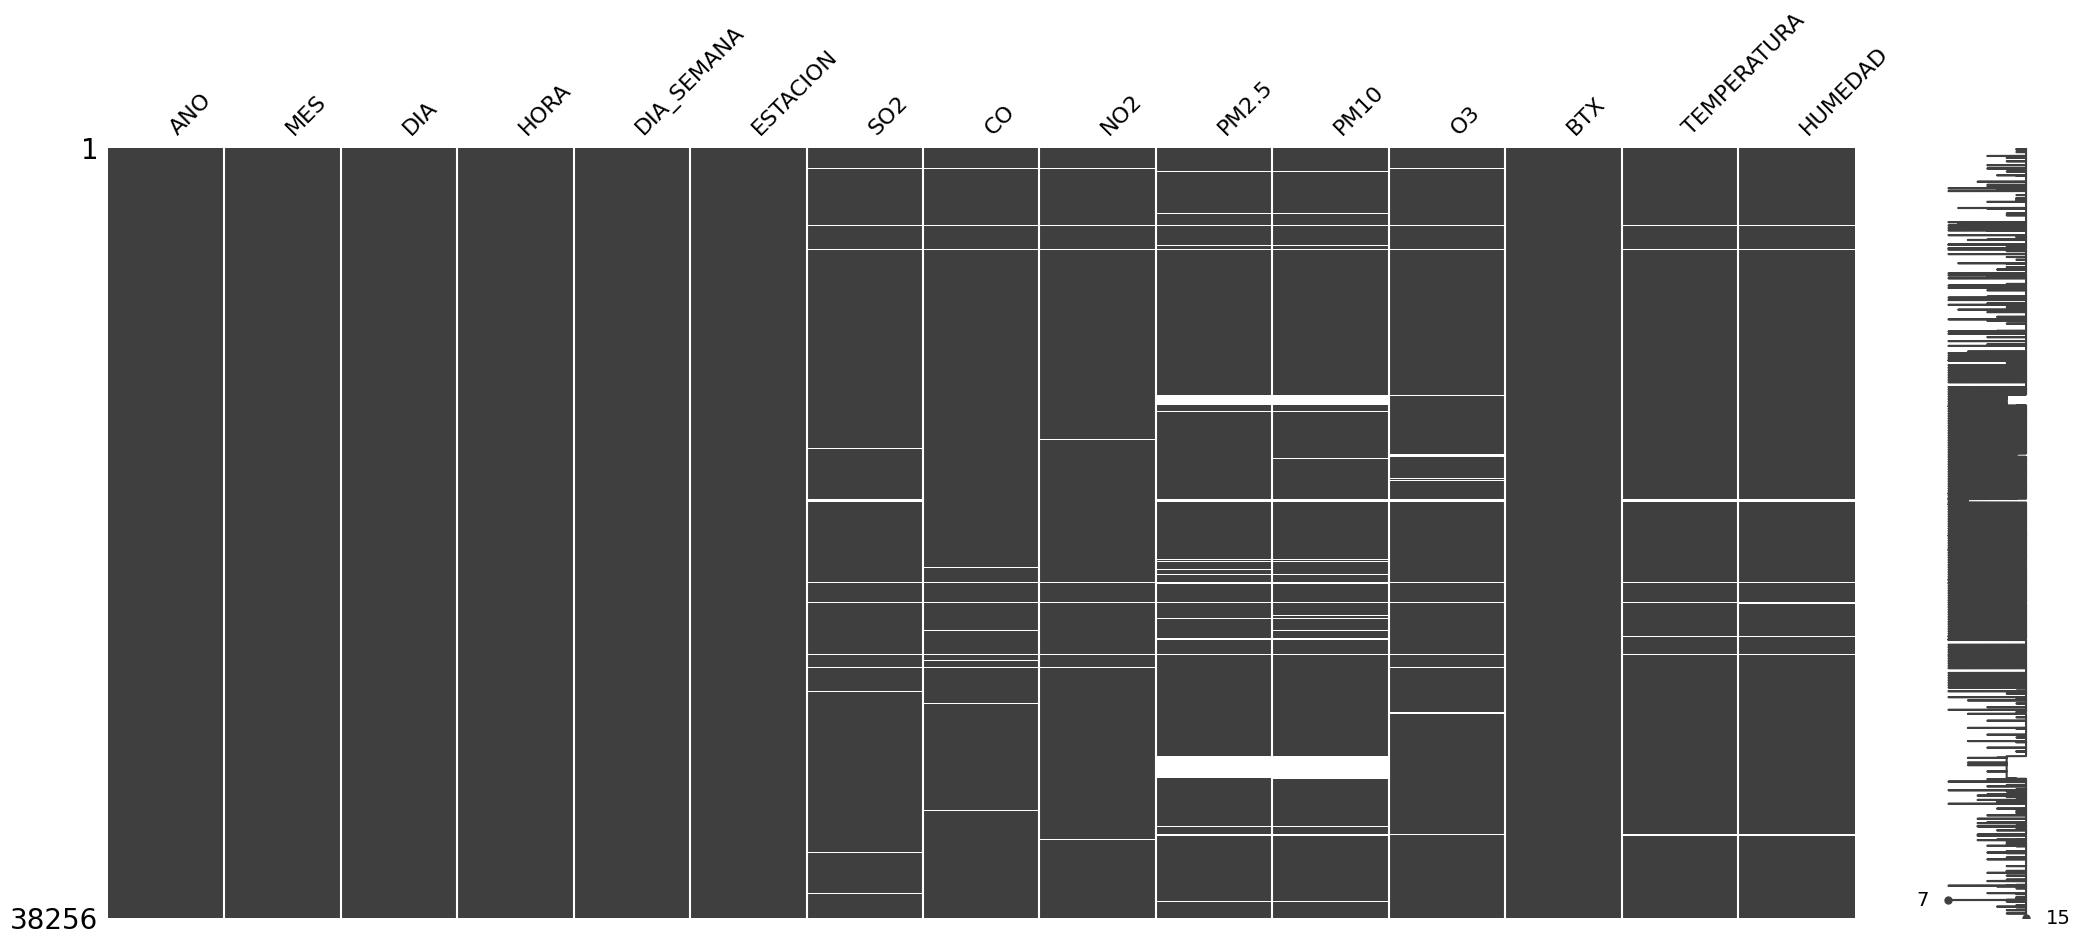

In [22]:
%matplotlib inline
msno.matrix(data)

#####  1.3. Rellenar las columnas que contienen valore nulos.

* IterativeImputer: Se rellenan los nulos con una predicción a partir de una regresión

1. Obtener la lista de columnas que contienen valores faltantes 

* Función:  obtener_columnas_con_nulos(df)

In [23]:
columnas_nulos = util.obtener_columnas_con_nulos(datos_seleccionados)
columnas_nulos

['SO2', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'TEMPERATURA', 'HUMEDAD']

2. Rellenar los valores faltantes mediante predección de una regresión

* Función: rellenar_nulos_regresion(df, columns)

In [24]:
columns_to_impute = columnas_nulos
data = util.rellenar_nulos_regresion(data, columns_to_impute)

In [25]:
data.describe().round(1)

,ANO,MES,DIA,HORA,ESTACION,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD
count,38256.0,38256.0,38256.0,38256.0,38256.0,38256.0,38256.0,38256.0,38256.0,38256.0,38256.0,38256.0,38256.0,38256.0
mean,2020.7,6.2,15.8,11.5,8.0,5.1,0.3,38.3,9.7,18.9,48.7,3.2,16.3,55.0
std,1.3,3.5,8.8,6.9,0.0,3.2,0.2,24.9,8.0,15.5,28.7,3.8,8.2,21.8
min,2019.0,1.0,1.0,0.0,8.0,0.0,0.1,3.0,0.0,1.0,0.8,0.0,-30.2,0.0
25%,2020.0,3.0,8.0,5.8,8.0,2.0,0.2,20.0,4.0,9.0,26.9,1.2,10.0,37.0
50%,2021.0,6.0,16.0,11.5,8.0,4.0,0.3,33.0,8.0,16.0,48.7,2.2,15.2,54.0
75%,2022.0,9.0,23.0,17.2,8.0,8.0,0.3,51.0,13.0,24.0,67.0,3.9,22.0,72.0
max,2023.0,12.0,31.0,23.0,8.0,35.0,2.9,279.0,106.0,322.0,181.0,150.6,42.5,100.0


Verifica si todavia hay valores nulos para las columnas selecionadas

In [26]:
data.isnull().sum()

ANO            0
MES            0
DIA            0
HORA           0
DIA_SEMANA     0
ESTACION       0
SO2            0
CO             0
NO2            0
PM2.5          0
PM10           0
O3             0
BTX            0
TEMPERATURA    0
HUMEDAD        0
dtype: int64

##### 1.4. Calcular el índice de calidad del aire (ICA) 

Función: calcular_ICA(df)

In [27]:
data = util.calcular_ICA(data)
data.head(2)

,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
FECHA,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2019.0,1.0,1.0,0,Martes,8.0,13.0,0.7,79.0,24.0,32.0,3.84,6.4,6.9,50.0,10.4,64.0,3.20,197.5,68.78
2019-01-01 01:00:00,2019.0,1.0,1.0,1,Martes,8.0,13.0,0.6,76.0,33.0,105.0,3.61,4.9,6.7,48.0,10.4,210.0,3.01,190.0,103.35


In [28]:
data.isnull().sum()

ANO            0
MES            0
DIA            0
HORA           0
DIA_SEMANA     0
ESTACION       0
SO2            0
CO             0
NO2            0
PM2.5          0
PM10           0
O3             0
BTX            0
TEMPERATURA    0
HUMEDAD        0
ICA_SO2        0
ICA_PM10       0
ICA_O3         0
ICA_NO2        0
ICA            0
dtype: int64

#####  1.5. Genera el CSV después del pocesamiento de los valores nulos

In [29]:
data.to_csv(ruta_nuevoCSV)